<a href="https://colab.research.google.com/github/nowshaba/Intrusion-Detection/blob/main/(Re)Assoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn.metrics as m
import keras
import tensorflow as tf
import sklearn
import tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import  Data
j=0
n=0
#to check whih files have both attack and normal labels
for j in range(0,37):
  df3=pd.read_csv("/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_"+str(j)+".csv")
  j+1
  for i in df3['Label']:
    if (i=='(Re)Assoc'):
      n=1
  if (n==1):
    print("n is",n, "and j is",j)

n is 1 and j is 22
n is 1 and j is 23
n is 1 and j is 24
n is 1 and j is 25
n is 1 and j is 26
n is 1 and j is 27
n is 1 and j is 28
n is 1 and j is 29
n is 1 and j is 30
n is 1 and j is 31
n is 1 and j is 32
n is 1 and j is 33
n is 1 and j is 34
n is 1 and j is 35
n is 1 and j is 36


In [ ]:
#much better than this is to put all the desired csv files in this case from 21 to 32 in one folder and use GLOB to put them in one df
df1 = pd.concat(
    map(pd.read_csv,["/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_22.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_23.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_24.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_25.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_26.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_27.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_28.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_29.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_30.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_31.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_32.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_33.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_34.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_35.csv","/content/drive/MyDrive/AWID3_Dataset_CSV/CSV/3.(Re)Assoc/(Re)Assoc_36.csv"]), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,120,137,146,148,149,151,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,244,247,248,250,251,252) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (58,71,73,77,78,79,80,82,84,85,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,115,118,122,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,250,251) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (20,21,43

In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

print(df1.columns)

Total columns with only 1 unique value: 52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.alert_message.level', 'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=202)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743939 entries, 0 to 743938
Columns: 202 entries, frame.encap_type to Label
dtypes: float64(76), object(126)
memory usage: 1.1+ GB


In [ ]:
df1['frame.time_epoch']=df1['frame.time_epoch'].astype('float64')

In [ ]:
df1.fillna(0, inplace=True)

In [ ]:
df1.dropna(1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743939 entries, 0 to 743938
Columns: 202 entries, frame.encap_type to Label
dtypes: float64(76), object(126)
memory usage: 1.1+ GB


In [ ]:
df1.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,...,tls.alert_message.level,tls.app_data_proto,tls.compress_certificate.compressed_certificate_message.length,tls.handshake.extension.type,tls.handshake.extensions_key_share_group,tls.handshake.session_ticket_length,tls.handshake.version,tls.record.content_type,tls.record.version,Label
0,23.0,88.0,1100001.0,Dec 18- 2020 19:16:01.792032000 GTB Standard Time,0.000195,0.000195,1.608312e+09,409.752772,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
1,23.0,76.0,1100002.0,Dec 18- 2020 19:16:01.792117000 GTB Standard Time,0.000085,0.000085,1.608312e+09,409.752857,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
2,23.0,70.0,1100003.0,Dec 18- 2020 19:16:01.792167000 GTB Standard Time,0.000050,0.000050,1.608312e+09,409.752907,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
3,23.0,88.0,1100004.0,Dec 18- 2020 19:16:01.792313000 GTB Standard Time,0.000146,0.000146,1.608312e+09,409.753053,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
4,23.0,76.0,1100005.0,Dec 18- 2020 19:16:01.792644000 GTB Standard Time,0.000331,0.000331,1.608312e+09,409.753384,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [ ]:
drop_cols = []
for i in df1.columns:
    if len(df1[i].unique())==1:
        drop_cols.append(i)
print("Total columns with only 1 unique value:", len(drop_cols))
df1.drop(drop_cols, 1, inplace=True)

Total columns with only 1 unique value: 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df1 = df1[df1.Label != 0]
#to remove labels that had NaN value which was replaced by zero above.

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df1,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()
train['Label'].value_counts()
test['Label'].value_counts()

Normal       221543
(Re)Assoc      1637
Name: Label, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743933 entries, 0 to 743938
Columns: 190 entries, frame.encap_type to Label
dtypes: float64(64), object(126)
memory usage: 1.1+ GB


In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

#creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

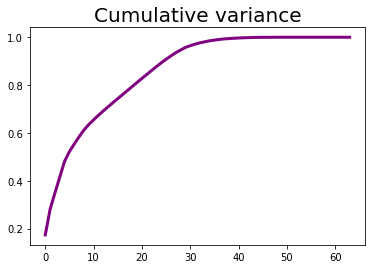

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#800080')
plt.title('Cumulative variance', size=20)
plt.show()

In [ ]:
Loads = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_X.columns) + 1)],
    index=train_X.columns
)
Loads.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
frame.encap_type,-1.852473e-19,7.986401e-21,-1.029823e-19,6.576587e-21,7.022403e-20,1.228058e-18,6.940354e-19,1.939488e-19,5.942081e-19,-6.372875e-22,...,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,2.521882e-16,-0.000000e+00
frame.len,8.051111e-01,3.180471e-03,-5.372205e-02,-6.350933e-04,-2.667425e-02,6.912799e-02,-4.105852e-02,-3.675289e-02,-2.583455e-02,-2.230214e-02,...,3.651752e-32,2.354497e-31,-5.171525e-34,3.246115e-32,2.975250e-32,-2.785427e-32,-2.711533e-32,8.884324e-32,2.967554e-35,-9.906097e-33
frame.number,1.041577e-01,1.233432e-02,8.432348e-01,9.595015e-02,-5.152038e-01,1.768864e-02,-2.470716e-02,-1.447689e-04,5.736430e-03,5.814318e-04,...,-4.503582e-31,2.123638e-31,-5.275067e-32,-2.991867e-31,-4.495038e-32,9.851191e-32,3.349984e-31,8.185383e-32,4.921535e-34,6.955479e-32
frame.time_delta,-4.812544e-02,2.110703e-02,-2.866726e-03,1.391593e-02,5.693415e-03,7.166589e-01,4.491150e-01,1.406066e-01,5.028083e-01,-4.722922e-03,...,1.116832e-17,3.746687e-17,2.145352e-18,-4.822822e-18,-3.233535e-17,-3.644600e-17,8.927827e-17,3.675152e-17,6.240895e-20,-1.080903e-17
frame.time_delta_displayed,-4.812544e-02,2.110703e-02,-2.866726e-03,1.391593e-02,5.693415e-03,7.166589e-01,4.491150e-01,1.406066e-01,5.028083e-01,-4.722922e-03,...,-1.116832e-17,-3.746687e-17,-2.145352e-18,4.822822e-18,3.233535e-17,3.644600e-17,-8.927827e-17,-3.675152e-17,-6.240895e-20,1.080903e-17


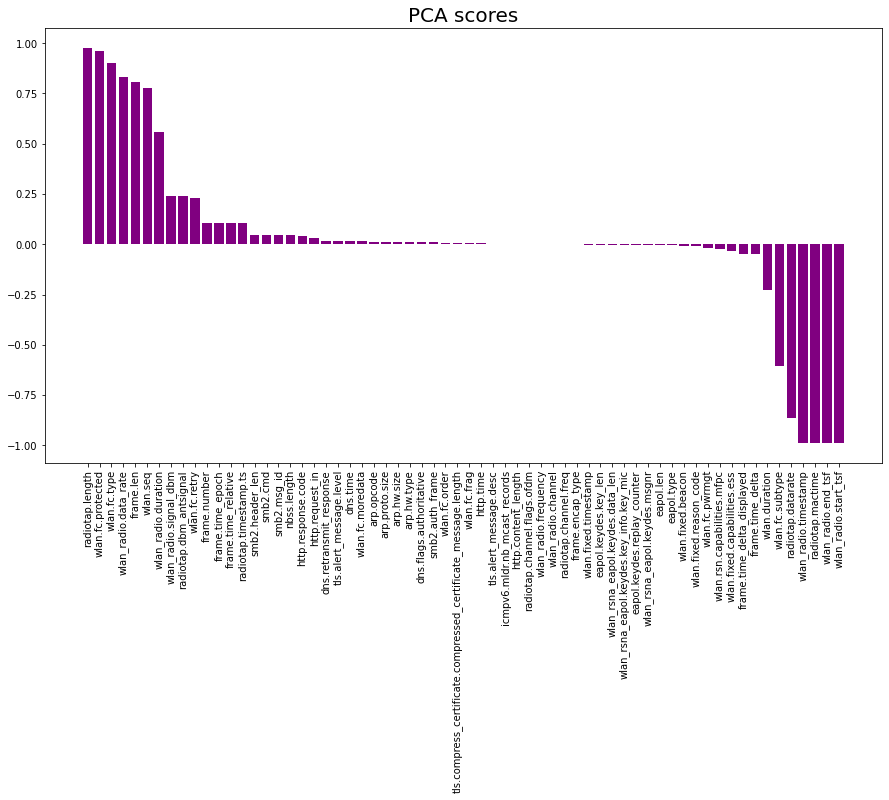

In [ ]:
pc1_Loads = Loads.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_Loads = pc1_Loads.reset_index()
pc1_Loads.columns = ['Feature', 'CorrelationtoPC1']
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(x=pc1_Loads['Feature'], height=pc1_Loads['CorrelationtoPC1'], color='#800080')
plt.title('PCA scores', size=20)
plt.xticks(rotation='vertical')
plt.show()